# Correlation

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
!gdown 'https://drive.google.com/uc?id=10Ls4AOmNg-ACgzoAb5eUG4CVvoeE0ljn'
column_names = ['user_id', 'item_id', 'ratings', 'timestamp']
df = pd.read_csv('ratings.dat', sep = '::', names = column_names, engine='python')

Downloading...
From: https://drive.google.com/uc?id=10Ls4AOmNg-ACgzoAb5eUG4CVvoeE0ljn
To: /content/ratings.dat
100% 24.6M/24.6M [00:00<00:00, 64.4MB/s]


In [8]:
df.head()

,user_id,item_id,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
!gdown 'https://drive.google.com/uc?id=1n8ixAV7Uq1A4zmTM3A3qOdrdQPsnqpHh'
column_names = ['id', 'title', 'genre']
movies = pd.read_csv('movies.dat', sep='::', names=column_names, engine='python', encoding='latin1')

Downloading...
From: https://drive.google.com/uc?id=1n8ixAV7Uq1A4zmTM3A3qOdrdQPsnqpHh
To: /content/movies.dat
100% 171k/171k [00:00<00:00, 90.5MB/s]


In [10]:
movies.head()

,id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
movies = movies.merge(df, left_on = 'id', right_on = 'item_id')
movies.head()

,id,title,genre,user_id,item_id,ratings,timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,1,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,1,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,1,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,1,5,978226474


In [12]:
# Relevent data
movies = movies[['id', 'title', 'user_id', 'ratings']]
movies.head()

,id,title,user_id,ratings
0,1,Toy Story (1995),1,5
1,1,Toy Story (1995),6,4
2,1,Toy Story (1995),8,4
3,1,Toy Story (1995),9,5
4,1,Toy Story (1995),10,5


In [13]:
sns.set_style('white')
%matplotlib inline

In [14]:
# Average rating
movies.groupby('title')['ratings'].mean().sort_values(ascending = False).head()

,ratings
title,
Ulysses (Ulisse) (1954),5.0
Lured (1947),5.0
Follow the Bitch (1998),5.0
Bittersweet Motel (2000),5.0
Song of Freedom (1936),5.0


In [15]:
# Number of users rated -> count
movies.groupby('title')['ratings'].count().sort_values(ascending = False).head()

,ratings
title,
American Beauty (1999),3428
Star Wars: Episode IV - A New Hope (1977),2991
Star Wars: Episode V - The Empire Strikes Back (1980),2990
Star Wars: Episode VI - Return of the Jedi (1983),2883
Jurassic Park (1993),2672


In [16]:
rating = pd.DataFrame(movies.groupby('title')['ratings'].mean())
rating.head()

,ratings
title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568


In [17]:
rating['count'] = pd.DataFrame(movies.groupby('title')['ratings'].count())
rating.head()

,ratings,count
title,,
"$1,000,000 Duck (1971)",3.027027,37
'Night Mother (1986),3.371429,70
'Til There Was You (1997),2.692308,52
"'burbs, The (1989)",2.910891,303
...And Justice for All (1979),3.713568,199


Text(0, 0.5, 'Frequency | Movies')

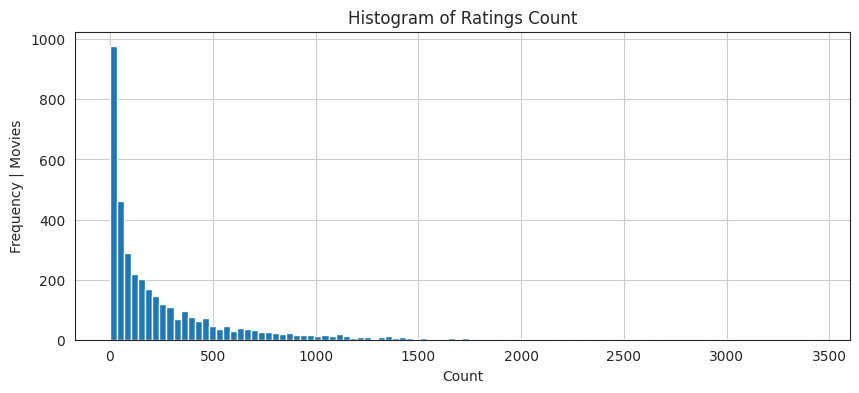

In [18]:
# Histograph -> For count | No.of movies which got following count
plt.figure(figsize=(10, 4))
rating['count'].hist(bins=100)
plt.title('Histogram of Ratings Count')
plt.xlabel('Count')
plt.ylabel('Frequency | Movies')

(1.0, 5.0)

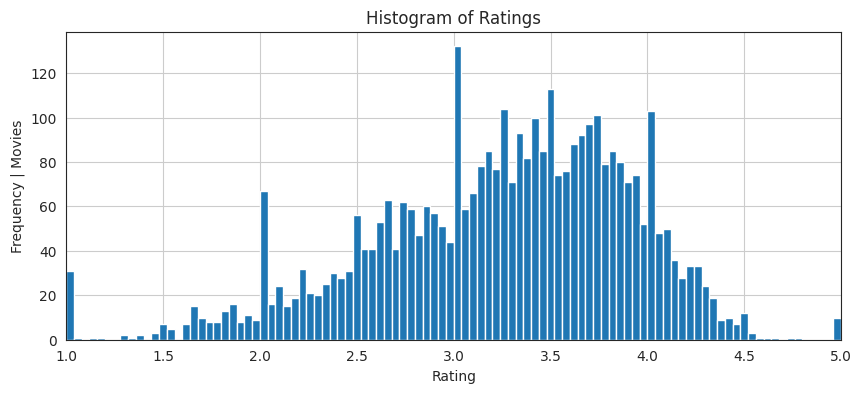

In [19]:
# Histograph -> For ratings | No.of movies which got following mean rating
# Forms a Guassian curve (normal probability distribution)
plt.figure(figsize = (10, 4))
rating['ratings'].hist(bins = 100)
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency | Movies')
plt.xlim(1, 5)

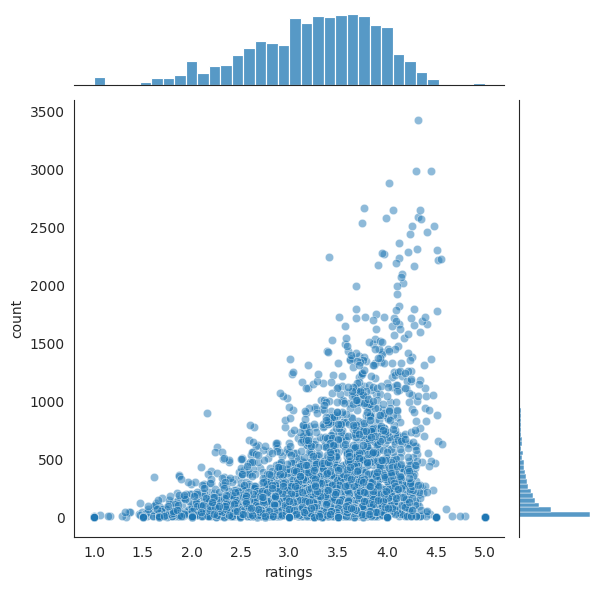

In [20]:
# Scatter Plot -> relationship between ratings and count
sns.jointplot(x = 'ratings', y = 'count', data = rating, alpha = 0.5)

In [21]:
movies['title'].nunique()

3706

In [22]:
movies['user_id'].nunique()

6040

In [23]:
# Matrix to show which user id gave ratings to which movie
movie_matrix = movies.pivot_table(index='user_id', columns='title', values='ratings')
movie_matrix.shape

(6040, 3706)

In [24]:
rating.sort_values('count', ascending = False).head()

,ratings,count
title,,
American Beauty (1999),4.317386,3428
Star Wars: Episode IV - A New Hope (1977),4.453694,2991
Star Wars: Episode V - The Empire Strikes Back (1980),4.292977,2990
Star Wars: Episode VI - Return of the Jedi (1983),4.022893,2883
Jurassic Park (1993),3.763847,2672


from matplotlib import pyplot as plt
_df_0['ratings'].plot(kind='hist', bins=20, title='ratings')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='ratings', y='count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['ratings'].plot(kind='line', figsize=(8, 4), title='ratings')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [25]:
# Extracting Ratings of specific movies
Jurassic_Park_rating = movie_matrix['Jurassic Park (1993)']
Jurassic_Park_rating.head(10)

,Jurassic Park (1993)
user_id,
1,NaN
2,5.0
3,4.0
4,4.0
5,NaN
6,NaN
7,4.0
8,5.0
9,4.0


In [26]:
# Cleaning -> removing Nulls
Jurassic_Park_rating_cleaned = Jurassic_Park_rating.dropna()
Jurassic_Park_rating_cleaned.head(10)

,Jurassic Park (1993)
user_id,
2,5.0
3,4.0
4,4.0
7,4.0
8,5.0
9,4.0
10,4.0
11,4.0
13,4.0


In [28]:
# Correlation between movies
similar_Jurassic_Park = movie_matrix.corrwith(Jurassic_Park_rating)

In [29]:
# Removing Nulls and creating new table for correlation -> Jurassic Park
corr_Jurassic_Park = pd.DataFrame(similar_Jurassic_Park, columns=['Correlation'])
corr_Jurassic_Park.dropna(inplace=True)
corr_Jurassic_Park.head()

,Correlation
title,
"$1,000,000 Duck (1971)",0.035806
'Night Mother (1986),0.185998
'Til There Was You (1997),0.109109
"'burbs, The (1989)",0.202455
...And Justice for All (1979),0.221315


In [30]:
corr_Jurassic_Park.sort_values('Correlation', ascending = False).head()

,Correlation
title,
"Friend of the Deceased, A (1997)",1.0
Dangerous Ground (1997),1.0
Foreign Student (1994),1.0
It's in the Water (1998),1.0
"Neon Bible, The (1995)",1.0


In [31]:
corr_Jurassic_Park = corr_Jurassic_Park.join(rating['count'])
corr_Jurassic_Park.head()

,Correlation,count
title,,
"$1,000,000 Duck (1971)",0.035806,37
'Night Mother (1986),0.185998,70
'Til There Was You (1997),0.109109,52
"'burbs, The (1989)",0.202455,303
...And Justice for All (1979),0.221315,199


In [32]:
# Adding filter of atleast 100 count to consider
corr_Jurassic_Park[corr_Jurassic_Park['count']>100].sort_values('Correlation', ascending = False).head(10)

,Correlation,count
title,,
Jurassic Park (1993),1.000000,2672
"Lost World: Jurassic Park, The (1997)",0.522265,1255
"Dark Half, The (1993)",0.491516,102
"Fighting Seabees, The (1944)",0.460547,101
"Believers, The (1987)",0.445108,102
"Program, The (1993)",0.443207,152
Oliver & Company (1988),0.424021,144
Ghosts of Mississippi (1996),0.415550,162
"Rescuers Down Under, The (1990)",0.412374,239


In [33]:
# Function for recommendation using above Correlation
def recommend(movie):
    movie_rating = movie_matrix[movie]
    movie_rating = movie_rating.dropna()
    similar_movie = movie_matrix.corrwith(movie_rating)
    corr_movie = pd.DataFrame(similar_movie, columns = ['Correlation'])
    corr_movie = corr_movie.join(rating['count'])
    recommend_movies = corr_movie[corr_movie['count']>100].sort_values('Correlation', ascending = False).head(10)
    return recommend_movies


In [34]:
recommend('Jurassic Park (1993)')

,Correlation,count
title,,
Jurassic Park (1993),1.000000,2672
"Lost World: Jurassic Park, The (1997)",0.522265,1255
"Dark Half, The (1993)",0.491516,102
"Fighting Seabees, The (1944)",0.460547,101
"Believers, The (1987)",0.445108,102
"Program, The (1993)",0.443207,152
Oliver & Company (1988),0.424021,144
Ghosts of Mississippi (1996),0.415550,162
"Rescuers Down Under, The (1990)",0.412374,239


In [35]:
recommend('Dark Half, The (1993)')

,Correlation,count
title,,
"Dark Half, The (1993)",1.000000,102
Captain Horatio Hornblower (1951),1.000000,105
Paris Is Burning (1990),0.963087,105
"Celebration, The (Festen) (1998)",0.923381,117
"Horse Whisperer, The (1998)",0.918559,210
Flying Tigers (1942),0.866025,101
All the King's Men (1949),0.866025,119
Flawless (1999),0.856565,110
Mildred Pierce (1945),0.832050,136
